# Outliers Dtection and Removal

In [22]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

## Load and Explore Sample Data Set

In [4]:
# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
print(df_diabetics.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


## Visualizing and Removing Outlier using Box Plot 

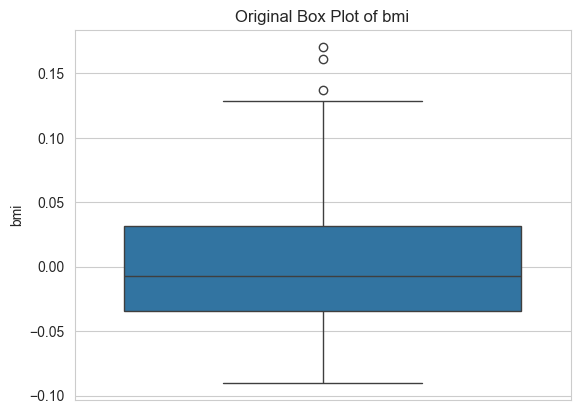

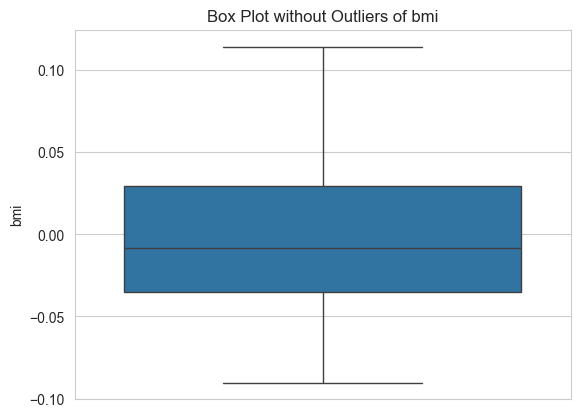

In [8]:
# Remove outliers and display
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 0.12

no_outliers = removal_box_plot(df_diabetics, 'bmi', threshold_value)

## Visualizing and Removing Outlier using Scatter Plot 

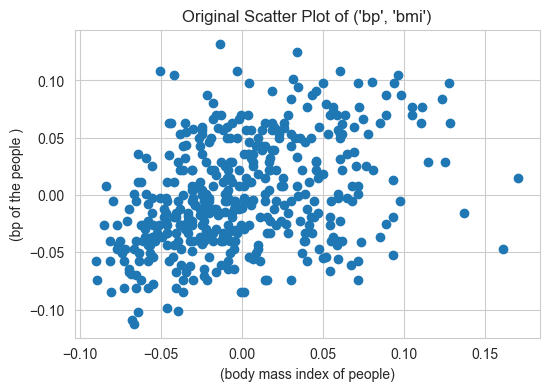

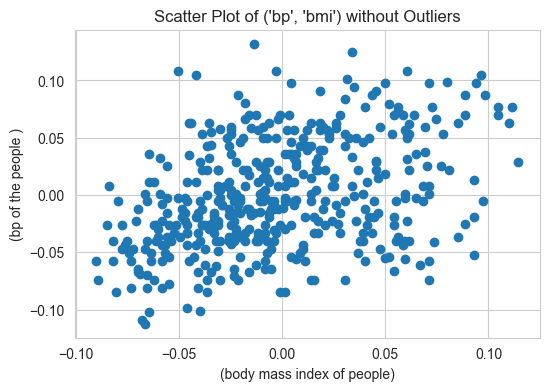

In [21]:
def removal_scatter_plot(df, y_column, x_column, y_threshold, x_threshold):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(df_diabetics[x_column], df_diabetics[y_column])
    ax.set_xlabel('(body mass index of people)')
    ax.set_ylabel('(bp of the people )')
    plt.title(f'Original Scatter Plot of {y_column, x_column}')
    plt.show()
    
    outlier_indices = np.where((df_diabetics[x_column] > x_threshold) & (df_diabetics[y_column] < y_threshold))
    no_outliers = df_diabetics.drop(outlier_indices[0])
    
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(no_outliers[x_column], no_outliers[y_column])
    ax.set_xlabel('(body mass index of people)')
    ax.set_ylabel('(bp of the people )')
    plt.title(f'Scatter Plot of {y_column, x_column} without Outliers')
    plt.show()
    
removal_scatter_plot(df_diabetics, 'bp','bmi',0.8,0.12)

## Z-Score

In [24]:
z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df_diabetics.drop(outlier_indices)
print("Original DataFrame Shape:", df_diabetics.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

[0.80050009 0.03956713 1.79330681 1.87244107 0.11317236 1.94881082
 0.9560041  1.33508832 0.87686984 1.49059233 2.02518057 0.57139085
 0.34228161 0.11317236 0.95323959 1.1087436  0.11593688 1.48782782
 0.80326461 0.57415536 1.03237385 1.79607132 1.79607132 0.95323959
 1.33785284 1.41422259 2.25428981 0.49778562 1.10597908 1.41145807
 1.26148309 0.49778562 0.72413034 0.6477606  0.34228161 1.02960933
 0.26591186 0.19230663 0.03956713 0.03956713 0.11317236 2.10155031
 1.26148309 0.41865135 0.95323959 0.57139085 1.18511334 1.64333183
 1.41145807 0.87963435 0.72413034 1.25871858 1.1087436  0.19230663
 1.03237385 0.87963435 0.87963435 0.57415536 0.87686984 1.33508832
 1.49059233 0.87963435 0.57415536 0.72689486 1.41145807 0.9560041
 0.19230663 0.87686984 0.80050009 0.34228161 0.03956713 0.03956713
 1.33508832 0.26591186 0.26591186 0.19230663 0.65052511 2.02518057
 0.11317236 2.17792006 1.48782782 0.26591186 0.34504612 0.80326461
 0.03680262 0.95323959 1.49059233 0.95323959 1.1087436  0.95600

## IQR (Inter Quartile Range)

In [25]:
# Load the dataset
diabetes = load_diabetes()

# Create the dataframe
column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes.columns = column_name
df_diabetes .head()
print("Old Shape: ", df_diabetes.shape)

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetes['bmi'] >= upper)[0]
lower_array = np.where(df_diabetes['bmi'] <= lower)[0]

# Removing the outliers
df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_diabetes.shape)

Old Shape:  (442, 10)
New Shape:  (439, 10)
